# Import needed libraries

In [17]:
# Install necessary libraries
!pip install -q numpy scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.datasets import make_blobs # A function to create a dataset.

# Output of plotting commands is displayed inline within the Jupyter notebook.
%matplotlib inline 

# Set a seed so that the results are consistent.
np.random.seed(3)

# Define functions and build Neural Network

In [3]:
def sigmoid(z):
    # Compute the sigmoid function of input z.
    res = 1 / (1 + np.exp(-z))  # Compute sigmoid function
    return res

# Sigmoid function is commonly used in neural networks as an activation function
# to introduce non-linearity into the network's outputs, helping the model learn
# complex patterns in the data and make predictions.

In [4]:
def layer_sizes(X, Y):
    # Determine the sizes of input, hidden, and output layers.

    n_x = X.shape[0]  # Number of units in the input layer
    n_h = 2           # Number of units in the hidden layer (commonly chosen)
    n_y = Y.shape[0]  # Number of units in the output layer
    return (n_x, n_h, n_y)

# The function layer_sizes is typically used in setting up the architecture
# of a neural network. It determines the number of units (neurons) in each layer:
#   - n_x: Number of input features or input neurons
#   - n_h: Number of neurons in the hidden layer(s). Often chosen based on trial and error.
#   - n_y: Number of output neurons, usually determined by the number of classes in classification tasks

In [5]:
def initialize_parameters(n_x, n_h, n_y):
    # Initialize parameters for a neural network.
    
    # Initialize weights and biases for the first layer
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    
    # Initialize weights and biases for the second layer
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    # Store parameters in a dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# The function initialize_parameters is used to set the initial values of weights and biases
# for each layer of the neural network. Proper initialization helps the network learn efficiently
# during training by avoiding issues like vanishing or exploding gradients.

In [6]:
def forward_propagation(X, parameters):
    # Perform forward propagation through the neural network.

    # Retrieve parameters
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Perform first linear transformation and activation
    Z1 = np.dot(W1, X) + b1
    A1 = sigmoid(Z1)
    
    # Perform second linear transformation and activation
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    # Ensure output shape is correct
    assert(A2.shape == (n_y, X.shape[1]))

    # Cache intermediate values for backpropagation
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

# The function forward_propagation computes the output of the neural network
# for a given input X using the current parameters. It also caches intermediate
# values required for backpropagation, enabling efficient training of the network.

In [7]:
def compute_cost(A2, Y):
    # Compute the cost function (cross-entropy loss) for the neural network.

    m = Y.shape[1]  # Number of examples
    
    # Compute cross-entropy loss
    logloss = -np.sum(np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), (1 - Y)))
    
    # Compute average cost
    cost = logloss / m
    
    assert(isinstance(cost, float))  # Ensure cost is a float
    
    return cost

# The function compute_cost calculates the cost function, which measures how well
# the neural network's predictions match the true labels. It's a crucial metric used
# to evaluate the performance of the network during training.

In [8]:
def backward_propagation(parameters, cache, X, Y):
    # Perform backward propagation to compute gradients of the loss function
    # with respect to the parameters.
    
    m = X.shape[1]  # Number of examples
    
    # Retrieve parameters and cached values
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    
    # Compute gradients
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

# The function backward_propagation computes the gradients of the loss function
# with respect to the parameters of the neural network using the cached intermediate
# values from forward propagation. These gradients are then used to update the parameters
# during the optimization process, facilitating learning.

In [9]:
def update_parameters(parameters, grads, learning_rate=1.2):
    # Update parameters using gradient descent.

    # Retrieve parameters and gradients
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update parameters using gradient descent
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    # Store updated parameters in a dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

# The function update_parameters implements the gradient descent algorithm to
# update the parameters of the neural network in the opposite direction of the
# gradients. This process helps to minimize the loss function and improve the
# performance of the network during training.

In [10]:
def predict(X, parameters):
    # Make predictions using the trained neural network.

    # Perform forward propagation to obtain predictions
    A2, cache = forward_propagation(X, parameters)
    
    # Convert probabilities to binary predictions (0 or 1)
    predictions = (A2 > 0.5)
    
    return predictions

# The function predict uses the trained neural network to make predictions on
# new input data X. It performs forward propagation to compute the output of
# the network and then applies a threshold (0.5) to classify each example as
# either 0 or 1, based on whether the predicted probability is greater than 0.5.

In [11]:
def nn_model(X, Y, n_h, num_iterations=10, learning_rate=1.2, print_cost=False):
    # Build and train a neural network model.
    
    n_x = layer_sizes(X, Y)[0]  # Number of input features
    n_y = layer_sizes(X, Y)[2]  # Number of output units
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop through iterations
    for i in range(0, num_iterations):
         
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Compute cost
        cost = compute_cost(A2, Y)
        
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Update parameters using gradient descent
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

# This function builds and trains a neural network model given input data X, true labels Y,
# and hyperparameters such as the number of units in the hidden layer (n_h), the number of
# iterations for optimization (num_iterations), the learning rate (learning_rate), and an option
# to print the cost during training (print_cost). It returns the parameters learnt by the model,
# which can then be used for making predictions.

In [12]:
def plot_decision_boundary(predict, parameters, X, Y, n_h):
    # Plot the decision boundary of a classification model.

    # Define ranges for plotting decision boundary
    min1, max1 = X[0, :].min() - 1, X[0, :].max() + 1
    min2, max2 = X[1, :].min() - 1, X[1, :].max() + 1
    
    # Generate grid of points for prediction
    x1grid = np.arange(min1, max1, 0.1)
    x2grid = np.arange(min2, max2, 0.1)
    xx, yy = np.meshgrid(x1grid, x2grid)
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
    grid = np.hstack((r1, r2))
    
    # Make predictions on the grid
    yhat = predict(grid.T, parameters)
    zz = yhat.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, zz, cmap='Paired')
    
    # Plot data points
    for class_value in range(2):
        row_ix = np.where(Y == class_value)
        plt.scatter(X[0, row_ix], X[1, row_ix], label=str(class_value))
    
    # Set plot title
    plt.title("Decision Boundary for {} layers".format(n_h))  # Using n_h here
    
    # Show plot
    plt.show()

# This function plots the decision boundary of a classification model by generating a 
# grid of points, making predictions for each point, and then contouring the predictions. 
# It also overlays the actual data points on the plot.

# Generate data

[]

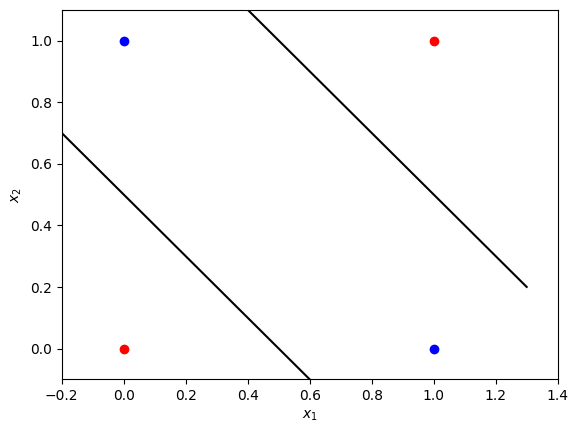

In [13]:
# Create a figure and axis object
fig, ax = plt.subplots()

# Set the range for x-axis
xmin, xmax = -0.2, 1.4

# Generate points along a line for plotting decision boundary
x_line = np.arange(xmin, xmax, 0.1)

# Data points (observations) from two classes.
# Plot red points for class 0 and blue points for class 1
ax.scatter(0, 0, color="r")  # Class 0
ax.scatter(0, 1, color="b")  # Class 1
ax.scatter(1, 0, color="b")  # Class 1
ax.scatter(1, 1, color="r")  # Class 0

# Set limits for x-axis and y-axis
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

# Set labels for x-axis and y-axis
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

# Example of the lines which can be used as a decision boundary to separate two classes.
# Plot decision boundary lines
ax.plot(x_line, -1 * x_line + 1.5, color="black")  # Decision boundary 1
ax.plot(x_line, -1 * x_line + 0.5, color="black")  # Decision boundary 2

# Show the plot
plt.plot()

# This code generates a plot with data points from two 
# classes and example decision boundary lines to separate them.

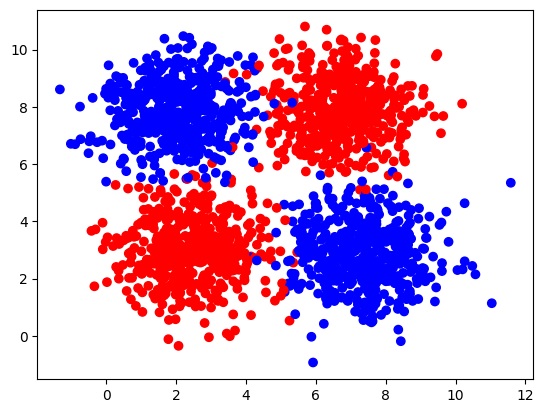

In [14]:
# Generate synthetic data using make_blobs function from scikit-learn
m = 2000  # Number of samples
samples, labels = make_blobs(n_samples=m, 
                             centers=([2.5, 3], [6.7, 7.9], [2.1, 7.9], [7.4, 2.8]), 
                             cluster_std=1.1,
                             random_state=0)

# Modify labels to create a binary classification problem
labels[(labels == 0) | (labels == 1)] = 1  # Class 1
labels[(labels == 2) | (labels == 3)] = 0  # Class 0

# Transpose samples matrix and reshape labels for consistency
X = np.transpose(samples)  # Features matrix
Y = labels.reshape((1, m))  # Reshaped labels

# Plot the data points
plt.scatter(X[0, :], X[1, :], c=Y, cmap=colors.ListedColormap(['blue', 'red']))

# This code generates synthetic data using the make_blobs function from scikit-learn. It creates a 
# dataset with 2000 samples distributed among four clusters. Then, it modifies the labels to create 
# a binary classification problem, where samples from two clusters are labeled as class 1, and samples 
# from the other two clusters are labeled as class 0. Finally, it plots the data points using 
# matplotlib, where class 1 points are marked in red and class 0 points are marked in blue.

# Apply Neural Network to find boundary lines

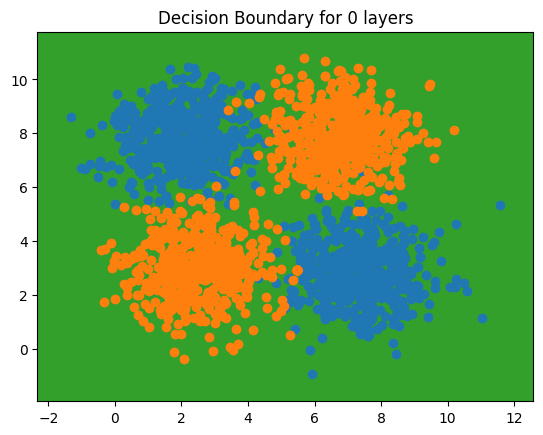

In [15]:
# Obtain the layer sizes from input data X and labels Y
(n_x, n_h, n_y) = layer_sizes(X, Y)

# Initialize parameters based on obtained layer sizes
parameters = initialize_parameters(n_x, n_h, n_y)

# Perform forward propagation to compute output and cache intermediate values
A2, cache = forward_propagation(X, parameters)

# Perform backward propagation to compute gradients
grads = backward_propagation(parameters, cache, X, Y)

# Update parameters using computed gradients
parameters_updated = update_parameters(parameters, grads)

# Define new input data for prediction
X_pred = np.array([[2, 8, 2, 8], [2, 8, 8, 2]])

# Use the trained model to make predictions on the new input data
Y_pred = predict(X_pred, parameters)

# Specify the number of units in the hidden layer for plotting the decision boundary
n_h = 0 # For this first example, we choose 0 to not find any real boundary

# Plot the decision boundary using the trained model
plot_decision_boundary(predict, parameters, X, Y, n_h)

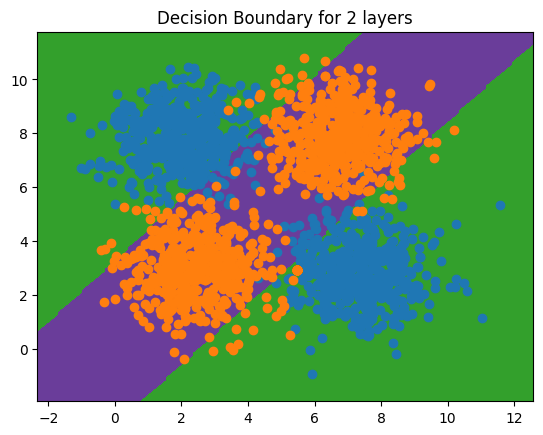

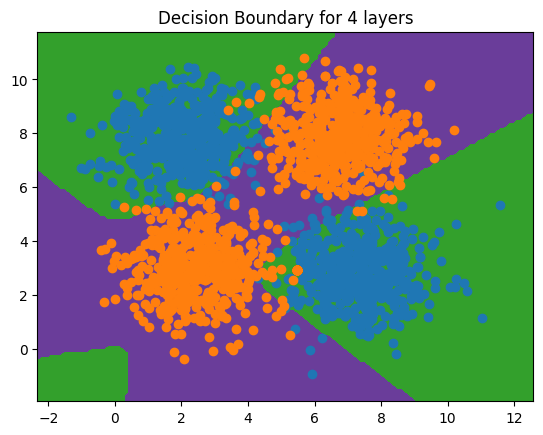

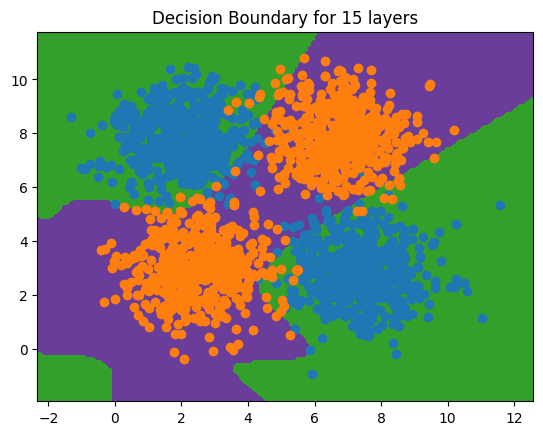

In [16]:
# Define the hidden layer sizes for experiments
hidden_layer_sizes = [2, 4, 15] # Under-fit, correct-fit, and over-fit

# Loop through each hidden layer size
for n_h in hidden_layer_sizes:
    # Train the neural network model
    parameters = nn_model(X, Y, n_h, num_iterations=3000, learning_rate=1.2, print_cost=False)
    # Plot the decision boundary using the trained model
    plot_decision_boundary(predict, parameters, X, Y, n_h)